In [1]:
%matplotlib notebook
from Face_Rec import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from camera import save_camera_config
save_camera_config(port=0, exposure=0.7)

Configuration saved: 
	port: 0, exposure 0.7 (sec)


In [2]:
def identify(save=True, from_file=False):
    """
    Takes a picture with configured camera and identifies all of the faces in the picture
    Parameters:
    -----------
    save (boolean):
        whether or not to add the captured image to theretrieve_database()
    from_file(boolean):
        whether or not expect a filename instead of taking a picture
    
    Returns:
    --------
    names (list)
        the list of the name of each person in the picture
    """
    if not from_file:
        descs = describe()
    else:
        filepath = input('Please enter the location (filepath) of the image: ')
        img = get_img_from_file(filepath)
        det = find_faces(img)
        descs = find_descriptors(img, det)
    names = compare_faces(descs,retrieve_database())
    if save:
        if len(descs) > 1:
            print("Cannot add multiple people at once.")
        elif len(descs) < 1:
            print("There's no one there!")
        else:
            add_image(descs[0], name=names[0])
    return names

In [3]:
def draw_faces(detections, people, img):
    """
    Draws bounding boxes over image, and labels them with people.
    
    Parameters
    ----------
    detections: list of rectangles
        List of bounding box rectangles corresponding to the position of each detected face.
    people: list of strings
        List of the keys/names of people as found by compare_faces(), or None if no match is found.
    img: numpy array, shape (480, 640, 3)
        The array representing the image.
    
    Returns:
    --------
    None
    """
    fig, ax = plt.subplots()
    ax.imshow(img)
    for i in range(len(detections)):
        d = detections[i]
        rect = patches.Rectangle((d.left(), d.top()), d.width(), d.height(), fill=False, linewidth=1.2, color='#57FF36')
        ax.add_patch(rect)
        if people[i] is not None:
            ax.text(d.left() + 8, d.top() + d.height() + 15, people[i], backgroundcolor='#57FF36', fontsize='5', color='black', weight='bold')
    plt.show()

In [4]:
def go():
    """
    Takes a picture from the configured camera and displays the image with recognized faces and labels
    Parameters:
    -----------
    None
    
    Returns:
    --------
    None; shows the image with captioned faces
    """
    img = get_img_from_camera()
    dets = find_faces(img)
    descs = find_descriptors(img, dets)
    compared = compare_faces(descs,retrieve_database())
    draw_faces(dets, compared, img)

In [8]:
identify(save=True)

['Jaden-1']

<IPython.core.display.Javascript object>


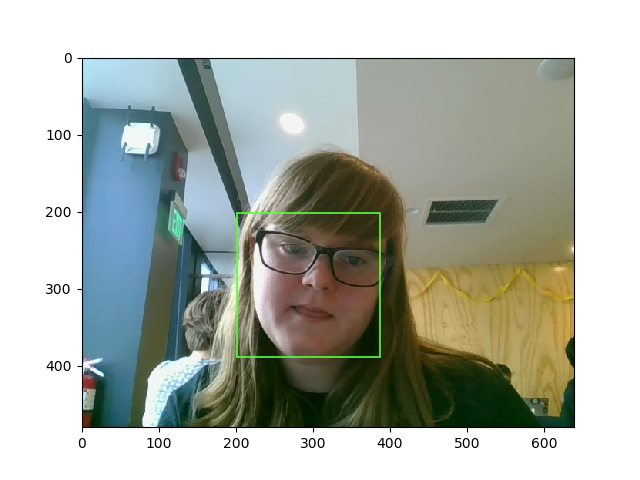

In [14]:
go()

In [10]:
def add_file(filepath):
    """
    Adds a person to theretrieve_database() given a picture of their face
    Will ask for their name
    
    Parameters
    ----------
    filepath (string):
        the location of the file that is the picture of the person's face
    Returns:
    --------
    None
    """
    img = get_img_from_file(filepath)
    det = find_faces(img)
    descriptor = find_descriptors(img, det)
    add_image(descriptor)

In [11]:
print(len(retrieve_database()))

2


In [12]:
retrieve_database()

{'Jaden-0': [[array([ -8.81109461e-02,   1.46255083e-02,  -7.92995840e-03,
           -7.82752112e-02,  -1.88931450e-01,  -3.50896157e-02,
            1.90127511e-02,  -5.25413565e-02,   6.98041990e-02,
           -1.25794008e-01,   1.53948799e-01,  -4.70687076e-02,
           -2.12376282e-01,  -2.26641260e-02,   6.58830628e-02,
            1.09057479e-01,  -1.11622147e-01,  -8.57166797e-02,
           -1.33714452e-01,  -5.23746088e-02,   1.82104446e-02,
            3.91820744e-02,  -9.67433397e-03,   8.78069177e-02,
           -1.34746850e-01,  -3.64106804e-01,  -6.97207153e-02,
           -1.33862257e-01,  -2.73979567e-02,  -2.31406419e-03,
            6.32278472e-02,   1.39576346e-01,  -1.06871046e-01,
            3.47504020e-02,   4.29105274e-02,   3.01530510e-02,
           -7.30725005e-02,  -5.58002219e-02,   2.02250347e-01,
           -1.39913019e-02,  -2.32342213e-01,  -7.87161663e-02,
            5.62619641e-02,   2.04744369e-01,   1.13070235e-01,
            5.15250769e-03,  

In [19]:
identify()

['Jaden-2']